# Analyzing Popular APP Categories on Google Play Store

In this project, our goal is to figure out what type of APP tend to be popular on Google Play Store. We work for a company that makes free APP and earn money through ads. By understanding which APP categories are in high demand, we can help our developers create APP that attract more users and genrate more revenue. We will analyze data from Google Play Store to identify pattern and preference among users. This way, we can make smarter decisions about the kinds of APPs we develop.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
appdata = pd.read_csv("googleplaystore.csv")  #importing dataset in pandas dataframe

In [3]:
appdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
appdata.shape

(10841, 13)

In [5]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
appdata["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [7]:
appdata[appdata["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
appdata[appdata["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [9]:
clean_list = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']

In [10]:
clean_list

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [11]:
appdata[appdata["Category"] == "1.9"] = clean_list

In [12]:
appdata["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [13]:
appdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
app_count = appdata["App"].value_counts()
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [15]:
app_count[app_count > 1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [16]:
# 798 APPs data is duplicate

In [17]:
duplicate_app_df = appdata[appdata.duplicated(subset = ["App"] , keep=False)]

In [18]:
duplicate_app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [19]:
num_duplicate_apps = duplicate_app_df["App"].nunique()
num_duplicate_apps

798

In [20]:
duplicate_app_df = appdata[appdata.duplicated(subset = ["App"] , keep="first")]

In [21]:
duplicate_app_df.shape

(1181, 13)

In [22]:
duplicate_app_df[duplicate_app_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [23]:
appdata.shape

(10841, 13)

In [24]:
10841-1181

9660

#### We dont want to count certain apps more than once when we analyze data, so we need to remove the duplicate entry and keep only one entry per app. One thing we could do is remove the duplicate rows randomnly, but there must be some better way. 

#### If you examine the rows, we printed two cell above for instagram app, the main difference happen on the fourth position of each row, which corresponds to the number of reviews. the different number show that the data was collected at different times. We can use this to build a criterion for keeping row. On this review, we cant remove the rows randomly, but rather we will keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

In [25]:
# group by apps and get the maximum number of reviews for each app

reviews_max = appdata.groupby("App")["Reviews"].max()

In [26]:
reviews_max

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [27]:
reviews_max["Instagram"]

'66577446'

In [28]:
andriod_clean = []

for index, row in appdata.iterrows():
    name = row["App"]
    n_reviews = row["Reviews"]
    
    if (reviews_max[name] == n_reviews):
        andriod_clean.append(row)

In [29]:
len(andriod_clean)

10056

In [30]:
# creating empty list to store clean data
andriod_clean = []

# creating list to keep already added app in it
already_added = []

# Iterate through each row in dataframe
for index, row in appdata.iterrows():
    name = row["App"]
    n_reviews = row["Reviews"]
    
    #check if the current app has the maximum number of reviews and has not been added before
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        andriod_clean.append(row)  # add the app to clean list
        already_added.append(name)  # add the app name to already_added list

In [31]:
len(andriod_clean)

9660

In [32]:
andriod_clean = pd.DataFrame(andriod_clean)

In [33]:
andriod_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [34]:
andriod_clean.shape

(9660, 13)

In [35]:
appdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [36]:
ord("A")

65

In [37]:
chr(65)

'A'

In [38]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    
    check = set(lst)
    
    if False in check:
        return False
    else:
        return True

In [39]:
is_english("Instagram")

True

In [40]:
is_english("Joke 😊😊😊")

False

In [41]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    
    non_ascii = 0
    
    for j in lst:
        if j == False:
            non_ascii +=1
            
    if non_ascii > 3:
        return False
    else:
        return True

In [42]:
is_english("English")

True

In [43]:
is_english("English 😊😊😊")

True

In [44]:
is_english("English 😊😊😊😊")

False

In [45]:
andriod_clean["App"].apply(is_english)

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: App, Length: 9660, dtype: bool

In [46]:
andriod_english = andriod_clean[andriod_clean["App"].apply(is_english)]

In [47]:
andriod_english.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [48]:
andriod_english.shape

(9615, 13)

In [49]:
andriod_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [50]:
android_final = andriod_english[andriod_english["Price"] == "0"]

In [51]:
android_final.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [52]:
android_final.shape

(8863, 13)

# Analysis

In [53]:
android_final["Category"].value_counts(normalize = True)*100

Category
FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
A

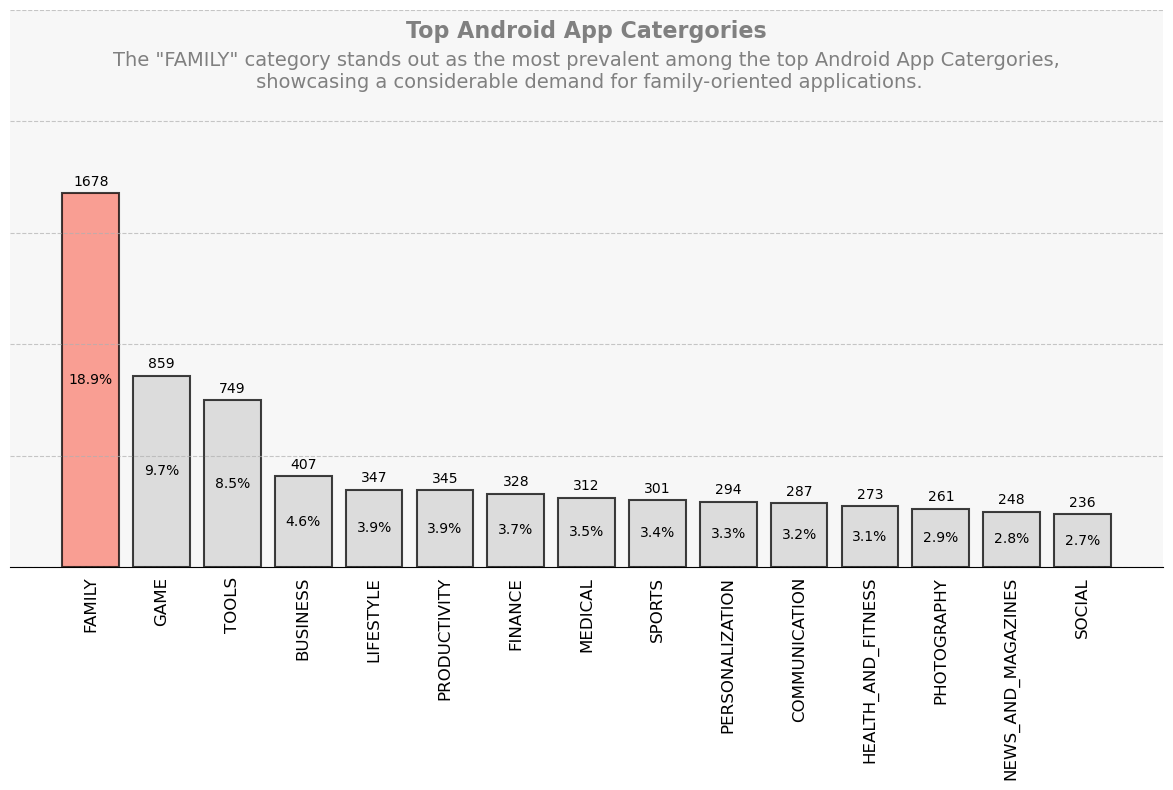

In [54]:
# Data

categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize = True)*100,1)[:15]

#create stylish bar chart
plt.figure(figsize = (12 , 8))
bars = plt.bar(categories , counts, color = "lightgray" , alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize=12)
plt.grid(axis = "y" , linestyle = "--" , alpha=0.7)
plt.grid(axis = "x" , linestyle = "")
plt.xticks(fontsize=12)  # customized tick labels
plt.yticks(range(0, 3000, 500) , [] , fontsize = 12) # customized tick labels and ytick range
plt.tick_params(bottom = 0 , left = 0)

#find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

#adding data labels and percentages inside each bar

for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height + 20, "%d" % int(height), ha="center", va="bottom",fontsize=10)
    plt.text(bar.get_x()+bar.get_width()/2, height/2, f"{perc}%", ha="center", va="center",fontsize=10, color="black")

#adding a backgound color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Adding chart title inside the chart
plt.text(0.5, 0.95, "Top Android App Catergories" , horizontalalignment = "center", fontsize=16, transform=plt.gca().transAxes, color="gray", fontweight="bold")

#Adding conclusion inside the chart
plt.text(0.5, 0.86, 'The "FAMILY" category stands out as the most prevalent among the top Android App Catergories,\n showcasing a considerable demand for family-oriented applications.'  , horizontalalignment = "center", fontsize=14, transform=plt.gca().transAxes, color="gray")


#remove spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()
    
plt.show()

In [55]:
android_final[android_final["Category"] == "FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


# Most Popular Apps by Genre on Google Play Store

#### For the Google play market, we actually have data about the number of install, so we will be able to get a clearer picture about the genre popularity, however the install numbers don't seem precise enough ----- we can see that most values are open-ended (100+ , 1000+, 5000+ etc)

In [56]:
android_final["Installs"].value_counts(normalize = True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [57]:
android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\hussaink\AppData\Local\Temp\ipykernel_23848\3840374705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [58]:
android_final["Installs_int"]

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [59]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [60]:
install_frq_per = round(android_final["Installs_int"].value_counts(normalize = True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

Installs_int
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

In [61]:
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [62]:
# alpha numeric units

def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [63]:
alphanumeric_units(10000)

'10K'

In [64]:
install_frq.index

Index([      1000,       5000,      10000,      50000,     100000,     500000,
          1000000,    5000000,   10000000,   50000000,  100000000,  500000000,
       1000000000],
      dtype='int32', name='Installs_int')

In [65]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

Installs_int
1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: count, dtype: int64

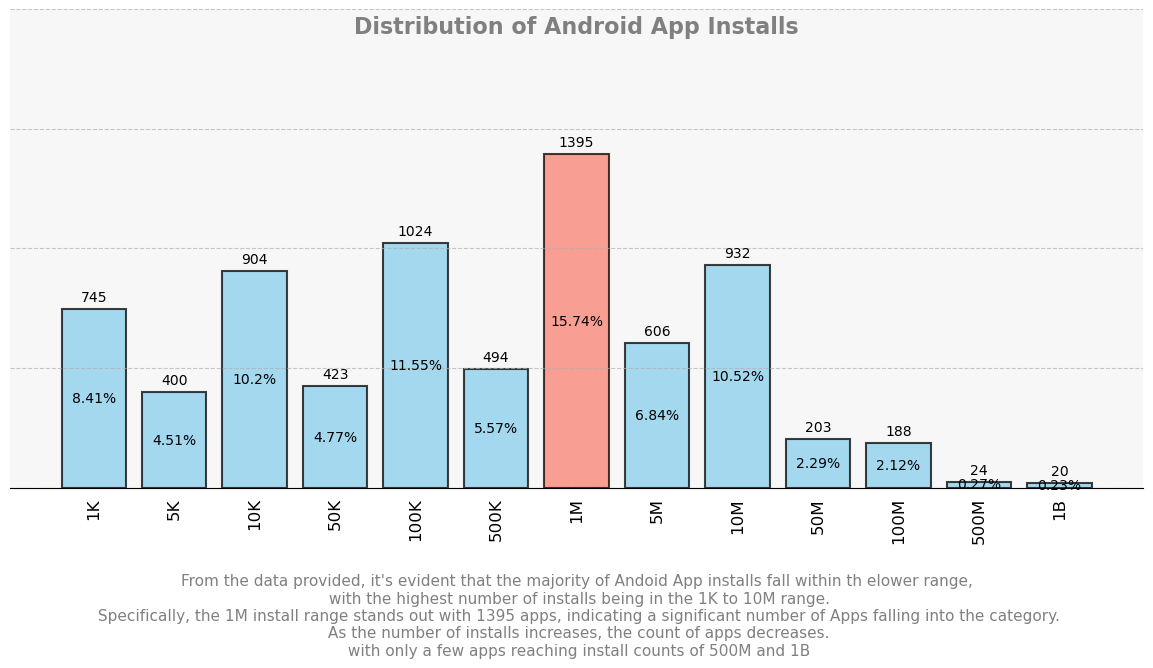

In [66]:
# Data

categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values

#create stylish bar chart
plt.figure(figsize = (12 , 7))
bars = plt.bar(categories , counts, color = "skyblue" , alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize=12)
plt.grid(axis = "y" , linestyle = "--" , alpha=0.7)
plt.grid(axis = "x" , linestyle = "")
plt.xticks(fontsize=12)  # customized tick labels
plt.yticks(range(0, 2500, 500) , [] , fontsize = 12) # customized tick labels and ytick range
plt.tick_params(bottom = 0 , left = 0)

#find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

#adding data labels and percentages inside each bar

for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height + 20, "%d" % int(height), ha="center", va="bottom",fontsize=10)
    plt.text(bar.get_x()+bar.get_width()/2, height/2, f"{perc}%", ha="center", va="center",fontsize=10, color="black")

#adding a backgound color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Adding chart title inside the chart
plt.text(0.5, 0.95, "Distribution of Android App Installs" , horizontalalignment = "center", fontsize=16, transform=plt.gca().transAxes, color="gray", fontweight="bold")

#Adding conclusion inside the chart
plt.text(0.5, -0.35, "From the data provided, it's evident that the majority of Andoid App installs fall within th elower range,\n with the highest number of installs being in the 1K to 10M range.\n Specifically, the 1M install range stands out with 1395 apps, indicating a significant number of Apps falling into the category.\n As the number of installs increases, the count of apps decreases.\n with only a few apps reaching install counts of 500M and 1B"  , horizontalalignment = "center", fontsize=11, transform=plt.gca().transAxes, color="gray")


#remove spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()
    
plt.show()

In [67]:
categories_android = android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [68]:
android_final

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,100
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1000


In [69]:
categories_installs = pd.pivot_table(android_final, values="Installs_int", index="Category", aggfunc = "mean")
categories_installs = categories_installs.sort_values(by = "Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION          3.845612e+07
VIDEO_PLAYERS          2.472787e+07
SOCIAL                 2.325365e+07
PHOTOGRAPHY            1.780563e+07
PRODUCTIVITY           1.678733e+07
GAME                   1.556097e+07
TRAVEL_AND_LOCAL       1.398408e+07
ENTERTAINMENT          1.164071e+07
TOOLS                  1.068230e+07
NEWS_AND_MAGAZINES     9.549178e+06
BOOKS_AND_REFERENCE    8.767812e+06
SHOPPING               7.036877e+06
PERSONALIZATION        5.201483e+06
WEATHER                5.074486e+06
HEALTH_AND_FITNESS     4.188822e+06
MAPS_AND_NAVIGATION    4.056942e+06
FAMILY                 3.694276e+06
SPORTS                 3.638640e+06
ART_AND_DESIGN         1.986335e+06
FOOD_AND_DRINK         1.924898e+06
EDUCATION              1.820673e+06
BUSINESS               1.712290e+06
LIFESTYLE              1.433676e+06
FINANCE                1.387692e+06
HOUSE_AND_HOME         1.331541e+06
DATING                 8.540288e+05
COMICS                 8.176573e+05
AUTO_AND_VEHICLES  

In [70]:
# display DataFrame without scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [71]:
categories_installs = pd.pivot_table(android_final, values="Installs_int", index="Category", aggfunc = "mean")
categories_installs = categories_installs.sort_values(by = "Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [72]:
# alpha numeric units

def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [73]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

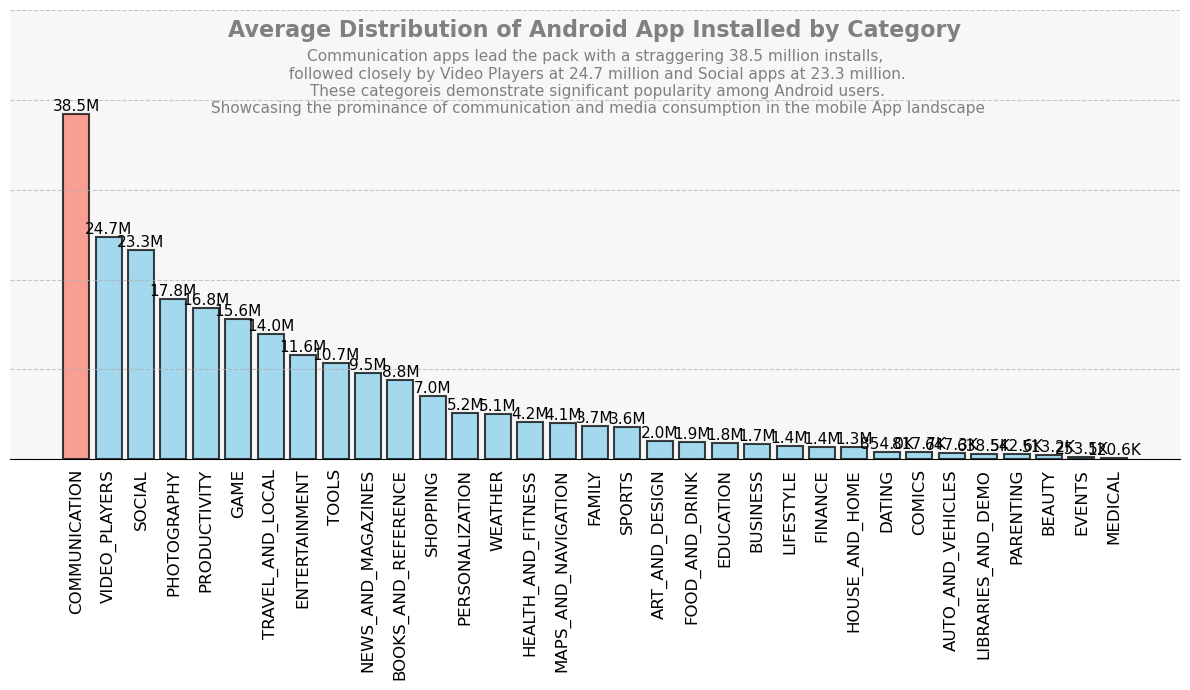

In [74]:
# Data

categories = categories_installs.index
counts = categories_installs.values

#create stylish bar chart
plt.figure(figsize = (12 , 7))
bars = plt.bar(categories , counts, color = "skyblue" , alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize=12)
plt.grid(axis = "y" , linestyle = "--" , alpha=0.7)
plt.grid(axis = "x" , linestyle = "")
plt.xticks(fontsize=12)  # customized tick labels
plt.yticks(range(0, 60000000, 10000000) , [] , fontsize = 12) # customized tick labels and ytick range
plt.tick_params(bottom = 0 , left = 0)

#find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

#adding data labels and percentages inside each bar

for bar, units in zip(bars, categories_installs_unit.values):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height + 25, units , ha="center", va="bottom",fontsize=11)

#adding a backgound color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Adding chart title inside the chart
plt.text(0.5, 0.94, "Average Distribution of Android App Installed by Category" , horizontalalignment = "center", fontsize=16, transform=plt.gca().transAxes, color="gray", fontweight="bold")

#Adding conclusion inside the chart
plt.text(0.5, 0.77, "Communication apps lead the pack with a straggering 38.5 million installs,\n followed closely by Video Players at 24.7 million and Social apps at 23.3 million.\n These categoreis demonstrate significant popularity among Android users.\n Showcasing the prominance of communication and media consumption in the mobile App landscape"  , horizontalalignment = "center", fontsize=11, transform=plt.gca().transAxes, color="gray")


#remove spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()
    
plt.show()

In [75]:
catergory_group = android_final.groupby("Category")

In [76]:
# alpha numeric units

def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.1f}'

In [77]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [78]:
Communication = catergory_group.get_group("COMMUNICATION").sort_values(by="Installs_int", ascending = False)
df = Communication[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [79]:
VIDEO_PLAYERS = catergory_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending = False)
df = VIDEO_PLAYERS[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [80]:
SOCIAL = catergory_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending = False)
df = SOCIAL[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [81]:
PHOTOGRAPHY = catergory_group.get_group("PHOTOGRAPHY").sort_values(by="Installs_int", ascending = False)
df = PHOTOGRAPHY[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


In [82]:
TOOLS = catergory_group.get_group("TOOLS").sort_values(by="Installs_int", ascending = False)
df = TOOLS[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3234,Google,1000000000,1B
3265,Gboard - the Google Keyboard,500000000,500M
3255,SHAREit - Transfer & Share,500000000,500M
4005,Clean Master- Space Cleaner & Antivirus,500000000,500M
3235,Google Translate,500000000,500M
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000,500M
8452,Automatic Call Recorder,100000000,100M
3266,Google Korean Input,100000000,100M
7550,Battery Doctor-Battery Life Saver & Battery Co...,100000000,100M
3272,Share Music & Transfer Files - Xender,100000000,100M


In [83]:
BOOKS_AND_REFERENCE = catergory_group.get_group("BOOKS_AND_REFERENCE").sort_values(by="Installs_int", ascending = False)
df = BOOKS_AND_REFERENCE[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
152,Google Play Books,1000000000,1B
4715,Wattpad 📖 Free Books,100000000,100M
5651,Audiobooks from Audible,100000000,100M
3941,Bible,100000000,100M
4083,Amazon Kindle,100000000,100M
4100,Aldiko Book Reader,10000000,10M
6296,English Dictionary - Offline,10000000,10M
9642,Oxford Dictionary of English : Free,10000000,10M
9625,JW Library,10000000,10M
9621,Dictionary - Merriam-Webster,10000000,10M


In [84]:
ENTERTAINMENT = catergory_group.get_group("ENTERTAINMENT").sort_values(by="Installs_int", ascending = False)
df = ENTERTAINMENT[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
874,Talking Angela,100000000,100M
866,Hotstar,100000000,100M
888,IMDb Movies & TV,100000000,100M
958,Netflix,100000000,100M
893,Talking Ben the Dog,100000000,100M
879,Talking Ginger 2,50000000,50M
889,Twitch: Livestream Multiplayer Games & Esports,50000000,50M
886,Amazon Prime Video,50000000,50M
892,PlayStation App,50000000,50M
863,Motorola Spotlight Player™,10000000,10M


In [85]:
TRAVEL_AND_LOCAL = catergory_group.get_group("TRAVEL_AND_LOCAL").sort_values(by="Installs_int", ascending = False)
df = TRAVEL_AND_LOCAL[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3223,Maps - Navigate & Explore,1000000000,1B
3232,Google Street View,1000000000,1B
3136,TripAdvisor Hotels Flights Restaurants Attract...,100000000,100M
3112,Booking.com Travel Deals,100000000,100M
9841,Google Earth,100000000,100M
3151,2GIS: directory & navigator,50000000,50M
3125,VZ Navigator,50000000,50M
3103,trivago: Hotels & Travel,50000000,50M
9833,MAPS.ME – Offline Map and Travel Navigation,50000000,50M
3217,Agoda – Hotel Booking Deals,10000000,10M


In [86]:
HEALTH_AND_FITNESS = catergory_group.get_group("HEALTH_AND_FITNESS").sort_values(by="Installs_int", ascending = False)
df = HEALTH_AND_FITNESS[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
5596,Samsung Health,500000000,500M
1360,Period Tracker - Period Calendar Ovulation Tra...,100000000,100M
1362,Calorie Counter - MyFitnessPal,50000000,50M
1283,Garmin Connect™,10000000,10M
1316,Daily Workouts - Exercise Fitness Routine Trainer,10000000,10M
1391,Runtastic Running App & Mile Tracker,10000000,10M
1390,Lose It! - Calorie Counter,10000000,10M
1389,Nike+ Run Club,10000000,10M
1292,Runkeeper - GPS Track Run Walk,10000000,10M
1387,Endomondo - Running & Walking,10000000,10M


In [87]:
PERSONALIZATION = catergory_group.get_group("PERSONALIZATION").sort_values(by="Installs_int", ascending = False)
df = PERSONALIZATION[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3354,ZEDGE™ Ringtones & Wallpapers,100000000,100M
4474,Parallel Space - Multiple accounts & Two face,100000000,100M
3425,Backgrounds HD (Wallpapers),100000000,100M
4812,GO Launcher - 3D parallax Themes & HD Wallpapers,100000000,100M
3446,"GO Keyboard - Emoticon keyboard, Free Theme, GIF",100000000,100M
3360,"CM Launcher 3D - Theme, Wallpapers, Efficient",100000000,100M
3385,"Hola Launcher- Theme,Wallpaper",100000000,100M
3374,"APUS Launcher - Theme, Wallpaper, Hide Apps",100000000,100M
3352,Nova Launcher,50000000,50M
3365,ZenUI Launcher,50000000,50M


In [88]:
NEWS_AND_MAGAZINES = catergory_group.get_group("NEWS_AND_MAGAZINES").sort_values(by="Installs_int", ascending = False)
df = NEWS_AND_MAGAZINES[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
9844,Google News,1000000000,1B
3739,Twitter,500000000,500M
3819,Flipboard: News For Our Time,500000000,500M
3729,"Dailyhunt (Newshunt) - Latest News, Viral Videos",50000000,50M
3715,"Fox News – Breaking News, Live Video & News Al...",10000000,10M
3794,News Republic,10000000,10M
3738,"Topbuzz: Breaking News, Videos & Funny GIFs",10000000,10M
3740,"Pulse Nabd - World News, Urgent",10000000,10M
3777,NYTimes - Latest News,10000000,10M
3784,Bloomberg: Market & Financial News,10000000,10M


# Analysis of "NEWS_AND_MAGAZINES" Category and Potential for Educational News Apps in 2024

The News & Magazine category is dominated by general news apps covering diverse topics like politics, entertainment, and weather. A gap exists in catering specifically to educational news and updates.

Growing emphasis on lifelong learning fuels the demand for continuous access to educational resources and updates.Bridging the skills gap requires keeping users informed about in-demand skills and emerging technologies through dedicated news channels.

### Educational News App Potential:

Addressing Information GapsOffer comprehensive and up-to-date news on various educational topics like "Policy changes in education, Emerging educational technologies, Scholarship and funding opportunities, Research and development in educational fields, Local school and university news (including admissions, results, and events)

Utilize AI-powered recommendations to curate personalized news feeds and learning pathways based on user interests and goals.

## Conclusion:

By addressing the information gap and offering personalized learning experiences, educational news apps can become powerful tools for Lifelong learning, Bridging the skills gap, Promoting educational equity, Empowering individuals to navigate the evolving educational landscape and make informed decisions about their educational journeys.

This enhanced analysis provides a more compelling argument for the significant potential of educational news apps in 2024 and beyond.